In [76]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [77]:
data_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
urlretrieve(data_url, 'covid_data.csv')

('covid_data.csv', <http.client.HTTPMessage at 0x7f4349bd0390>)

In [78]:
raw_df = pd.read_csv('covid_data.csv')

In [79]:
raw_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102679,ZWE,Africa,Zimbabwe,2021-07-11,67765.0,912.0,1898.714,2185.0,59.0,43.857,4559.331,61.361,127.748,147.010,3.970,2.951,1.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4505.0,745612.0,50.166,0.303,8878.0,0.597,0.214,4.7,tests performed,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,64.81,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
102680,ZWE,Africa,Zimbabwe,2021-07-12,70426.0,2661.0,2058.857,2236.0,51.0,46.429,4738.367,179.036,138.523,150.441,3.431,3.124,1.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7037.0,752649.0,50.639,0.473,9364.0,0.630,0.220,4.5,tests performed,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,64.81,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
102681,ZWE,Africa,Zimbabwe,2021-07-13,73271.0,2845.0,2186.857,2274.0,38.0,47.857,4929.783,191.416,147.135,152.998,2.557,3.220,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13811.0,766460.0,51.569,0.929,9823.0,0.661,0.223,4.5,tests performed,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,NaN

**From the above view**
1. This dataset contains datas of covid till the date
2. It contains `1lakh+` rows and different information columns
3. Some of these columns in the dataset contains `null values`
4. Now we took `single country` and make a viz 

In [80]:
raw_df.isnull().sum().sort_values(ascending = False)

weekly_icu_admissions                    101733
weekly_icu_admissions_per_million        101733
weekly_hosp_admissions                   101070
weekly_hosp_admissions_per_million       101070
excess_mortality                          99060
icu_patients                              91996
icu_patients_per_million                  91996
hosp_patients                             89768
hosp_patients_per_million                 89768
people_fully_vaccinated_per_hundred       88225
people_fully_vaccinated                   88225
new_vaccinations                          87530
people_vaccinated                         85362
people_vaccinated_per_hundred             85362
total_vaccinations_per_hundred            84504
total_vaccinations                        84504
new_vaccinations_smoothed_per_million     70986
new_vaccinations_smoothed                 70986
total_tests                               56886
total_tests_per_thousand                  56886
new_tests_per_thousand                  

**From the above view**

1. `weekly_icu_admissions`  `weekly_icu_admissions_per_million` columns have the most null values. we may don't want this column for the viz.
2. We can use imputing technique to solve the problem.
3. We won't use all columns of the data, so lets seperate the country `India` and check for the null again.

In [81]:
raw_df[raw_df['location'] == 'India']
inr_df = raw_df[raw_df['location'] == 'India']

In [82]:
inr_df.isnull().sum().sort_values(ascending = False)

excess_mortality                         533
icu_patients                             533
icu_patients_per_million                 533
hosp_patients                            533
hosp_patients_per_million                533
weekly_icu_admissions                    533
weekly_icu_admissions_per_million        533
weekly_hosp_admissions                   533
weekly_hosp_admissions_per_million       533
people_fully_vaccinated_per_hundred      387
people_fully_vaccinated                  387
new_vaccinations                         364
total_vaccinations_per_hundred           358
people_vaccinated_per_hundred            358
people_vaccinated                        358
total_vaccinations                       358
new_vaccinations_smoothed_per_million    353
new_vaccinations_smoothed                353
new_tests_per_thousand                    69
new_tests                                 69
total_tests                               59
total_tests_per_thousand                  59
positive_r

**From the above view**

1. Among all the data, the country which have India has less null values.
2. But compared to the new dataset values, there are `523 X 60` row and columns.
3. Among all the values, there are 8 columns with 523 null values. which is there are no data for those columns. Similarly other columns also having null values nearly half of their values.

Now we can move further by converting this data to csv and remove the index. so that we get the orderes index numbers.

In [83]:
inr_df.to_csv('india_covid.csv', index = False)

In [84]:
ind_df = pd.read_csv('india_covid.csv')
ind_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
1,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
3,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
4,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,IND,Asia,India,2021-07-11,30874376.0,37154.0,41306.714,408764.0,724.0,862.286,22372.665,26.923,29.932,296.205,0.525,0.625,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1843500.0,430885470.0,312.235,1.336,1804360.0,1.308,0.023,43.7,samples tested,377352501.0,304018852.0,73333649.0,1319915.0,4281993.0,27.34,22.03,5.31,3103.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
529,IND,Asia,India,2021-07-12,30874376.0,0.0,36349.143,408764.0,0.0,783.286,22372.665,0.000,26.340,296.205,0.000,0.568,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1432343.0,432317813.0,313.273,1.038,1791479.0,1.298,0.020,49.3,samples tested,381467646.0,306612781.0,74854865.0,4115145.0,4319736.0,27.64,22.22,5.42,3130.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
530,IND,Asia,India,2021-07-13,30946147.0,71771.0,40354.571,411406.0,2642.0,1027.857,22424.673,52.008,29.242,298.119,1.914,0.745,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1740325.0,434058138.0,314.534,1.261,1804751.0,1.308,0.022,44.7,samples tested,387697935.0,31

In [85]:
inr_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

**From Now**

We don't need all the above columns for analysis. Also the other columns have the similar values in the dataset. That won't work for now.

* date
* new_cases
* new_deaths
* new_tests
* total_cases
* total_deaths
* total_tests
                                 

We can keep these columns as a new dataframe for the clear view.


In [86]:
india_df = inr_df[['date',
                'new_cases',
                'new_deaths',
                'new_tests',
                'total_cases',
                'total_deaths',
                'total_tests']]

india_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
42466,2020-01-30,1.0,NaN,NaN,1.0,NaN,NaN
42467,2020-01-31,0.0,NaN,NaN,1.0,NaN,NaN
42468,2020-02-01,0.0,NaN,NaN,1.0,NaN,NaN
42469,2020-02-02,1.0,NaN,NaN,2.0,NaN,NaN
42470,2020-02-03,1.0,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...
42994,2021-07-11,37154.0,724.0,1843500.0,30874376.0,408764.0,430885470.0
42995,2021-07-12,0.0,0.0,1432343.0,30874376.0,408764.0,432317813.0
42996,2021-07-13,71771.0,2642.0,1740325.0,30946147.0,411406.0,434058138.0
42997,2021-07-14,41733.0,583.0,1915501.0,30987880.0,411989.0,435973639.0


In [87]:
india_df.describe()

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
count,533.000000,492.000000,4.640000e+02,5.330000e+02,492.000000,4.740000e+02
mean,58211.686679,838.477642,9.250698e+05,8.689164e+06,126833.296748,1.435880e+08
std,85132.426892,1080.746978,6.525606e+05,9.193501e+06,112078.120229,1.285677e+08
min,-1858.000000,-39.000000,1.570000e+02,1.000000e+00,1.000000,6.500000e+03
25%,9309.000000,144.250000,3.760262e+05,2.975350e+05,23048.750000,1.446711e+07
50%,31118.000000,481.500000,8.999990e+05,7.761312e+06,128394.500000,1.261207e+08
75%,64399.000000,972.750000,1.171946e+06,1.117376e+07,158757.750000,2.290075e+08
max,414188.000000,7374.000000,3.740296e+06,3.102683e+07,412531.000000,4.380120e+08


**From the above results**

1. There is a huge variation between 25% - 50% values, these numbers are incerasing uneven order, when we use this in ML model is throws many outliers.
2. There seems to be more `total_death` than the `total_cases` registered.



# **Data Analysis and Visualization**

The best wyay to analyse is to make questions and find the visual soluation for that, lets make questions and mark the answer.

## **Q1. Timeline for the total_case and total_death**

the below code is to custamize settings for the graph that to be displayed

In [88]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [89]:
px.line(india_df,
        x = india_df.date,
        y = 'total_cases',
        title = 'Timeline of total cases and death')

In [90]:
px.line(india_df,
        x = india_df.date,
        y = 'total_deaths',
        title = 'Timeline of total cases and death')

## Q2 : First case of corona in India

In [91]:
first_case = india_df.date.loc[india_df['new_cases'].ne(0).idxmax()]
print(f'The first case of corona virus in India was reported on {first_case}')

The first case of corona virus in India was reported on 2020-01-30


As per the [news](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_India) ,it is true that the first case of india was reported on `30th jan 2020` in kerala thrissur. Let's gothrough the next question.

## Q3 : What was the total case at the time of impliminting the first lockdown in India 25 Mar 2020 

In [92]:
lockdown = '2020-03-25'

In [93]:
lockdown_case = india_df.total_cases.loc[india_df.loc[india_df.date == lockdown].index[0]]

In [94]:
print(f'The total number of case at the time of first lockdown {lockdown} is {int(lockdown_case)}')

The total number of case at the time of first lockdown 2020-03-25 is 657


## Q4 : What was the total death at the time of impliminting the first lockdown in India 25 Mar 2020 

In [95]:
lockdown_death = india_df.total_deaths.loc[india_df.loc[india_df.date == lockdown].index[0]]

In [96]:
print(f'The total number of deaths at the time of first lockdown {lockdown} is {int(lockdown_death)}')

The total number of deaths at the time of first lockdown 2020-03-25 is 12


## Q4 : When was the first death reported in india?

In [97]:
first_death = india_df.date.loc[india_df.new_deaths.ne(0).idxmax()]

In [98]:
print(f'The first death of the covid was caused in {first_death}')

The first death of the covid was caused in 2020-01-30


## Q5 : How did the new_cases and new_deaths evolved in india?

In [99]:
fig = px.line(india_df, 
        x = 'date',
        y = 'new_cases')
fig.add_scatter(x = india_df['date'],
                y = india_df['new_deaths'])
fig.show()

* At the middle month of april 2020 the cases starts increaisng slightly and reaches 2000 cases. During this period the government starts relaxing some facilities during the lockdown. That might leads to the high cases. 

* We can clearly see that, the case numbers are completely zero at the month of january, its because of the staffs may in leave/government holiday.

* The best thing that india did, they predict the third wave at the edge time before when it was started. which means the government announse that there will the 3rd wave within a month at feb-10. After that the cases were starts increasing and reach the peak at the month of may.

* Now the cases were starts decreasing and death rate is still in the alerting stage.


## Q6 : On which date the highest covid case was reported?

In [100]:
india_df.new_cases.describe()

count       533.000000
mean      58211.686679
std       85132.426892
min       -1858.000000
25%        9309.000000
50%       31118.000000
75%       64399.000000
max      414188.000000
Name: new_cases, dtype: float64

In [101]:
max_case_day = india_df.date.loc[india_df.new_cases == india_df.new_cases.max()]
max_case_day

42928    2021-05-06
Name: date, dtype: object

Let's create a dataframe to plot the graph, by taking `350k cases` as the threshold point.

In [102]:
high_case_df = india_df[india_df.new_cases > 350000]
high_case_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
42917,2021-04-25,352991.0,2812.0,1719588.0,17313163.0,195123.0,277918810.0
42919,2021-04-27,360927.0,3293.0,1658700.0,17997113.0,201187.0,280979877.0
42920,2021-04-28,379308.0,3645.0,1723912.0,18376421.0,204832.0,282703789.0
42921,2021-04-29,386555.0,3498.0,1768190.0,18762976.0,208330.0,284471979.0
42922,2021-04-30,401993.0,3523.0,1920107.0,19164969.0,211853.0,286392086.0
42923,2021-05-01,392488.0,3689.0,1945299.0,19557457.0,215542.0,288337385.0
42924,2021-05-02,368060.0,3417.0,1804954.0,19925517.0,218959.0,290142339.0
42925,2021-05-03,357316.0,3449.0,1504698.0,20282833.0,222408.0,291647037.0
42926,2021-05-04,382146.0,3780.0,1663742.0,20664979.0,226188.0,293310779.0
42927,2021-05-05,412431.0,3980.0,1541299.0,21077410.0,230168.0,294852078.0


In [103]:
high_case_df.sort_values('new_cases',ascending = False)

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
42928,2021-05-06,414188.0,3915.0,1923131.0,21491598.0,234083.0,296775209.0
42927,2021-05-05,412431.0,3980.0,1541299.0,21077410.0,230168.0,294852078.0
42930,2021-05-08,403405.0,4077.0,1808344.0,22296081.0,242347.0,300410043.0
42922,2021-04-30,401993.0,3523.0,1920107.0,19164969.0,211853.0,286392086.0
42929,2021-05-07,401078.0,4187.0,1826490.0,21892676.0,238270.0,298601699.0
42923,2021-05-01,392488.0,3689.0,1945299.0,19557457.0,215542.0,288337385.0
42921,2021-04-29,386555.0,3498.0,1768190.0,18762976.0,208330.0,284471979.0
42926,2021-05-04,382146.0,3780.0,1663742.0,20664979.0,226188.0,293310779.0
42920,2021-04-28,379308.0,3645.0,1723912.0,18376421.0,204832.0,282703789.0
42924,2021-05-02,368060.0,3417.0,1804954.0,19925517.0,218959.0,290142339.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



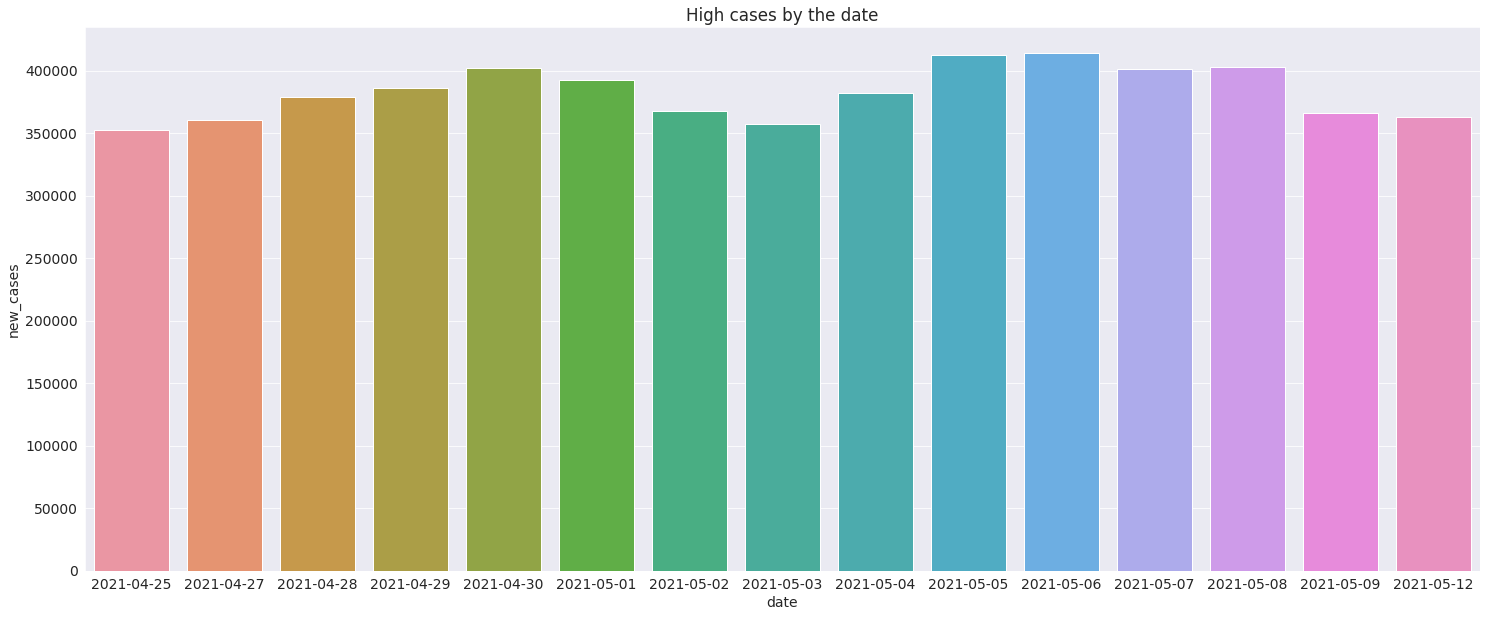

In [104]:
plt.figure(figsize=(25,10))
sns.barplot(high_case_df.date, high_case_df.new_cases)
plt.title('High cases by the date')
plt.show();

On the day `2021-05-06` was recorded the high case `414188`

In [105]:
india_df.new_deaths.describe()

count     492.000000
mean      838.477642
std      1080.746978
min       -39.000000
25%       144.250000
50%       481.500000
75%       972.750000
max      7374.000000
Name: new_deaths, dtype: float64

In [106]:
high_death_df = india_df[india_df.new_deaths > 500]
high_death_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
42604,2020-06-16,10974.0,2003.0,146936.0,354065.0,11903.0,5921069.0
42618,2020-06-30,18641.0,507.0,210292.0,585481.0,17400.0,8608654.0
42622,2020-07-04,24850.0,613.0,242383.0,673165.0,19268.0,9540132.0
42628,2020-07-10,27114.0,519.0,283659.0,820916.0,22123.0,11024491.0
42629,2020-07-11,28606.0,550.0,282511.0,849522.0,22673.0,11307002.0
...,...,...,...,...,...,...,...
42993,2021-07-10,41506.0,895.0,2025365.0,30837222.0,408040.0,429041970.0
42994,2021-07-11,37154.0,724.0,1843500.0,30874376.0,408764.0,430885470.0
42996,2021-07-13,71771.0,2642.0,1740325.0,30946147.0,411406.0,434058138.0
42997,2021-07-14,41733.0,583.0,1915501.0,30987880.0,411989.0,435973639.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'High deaths by day')

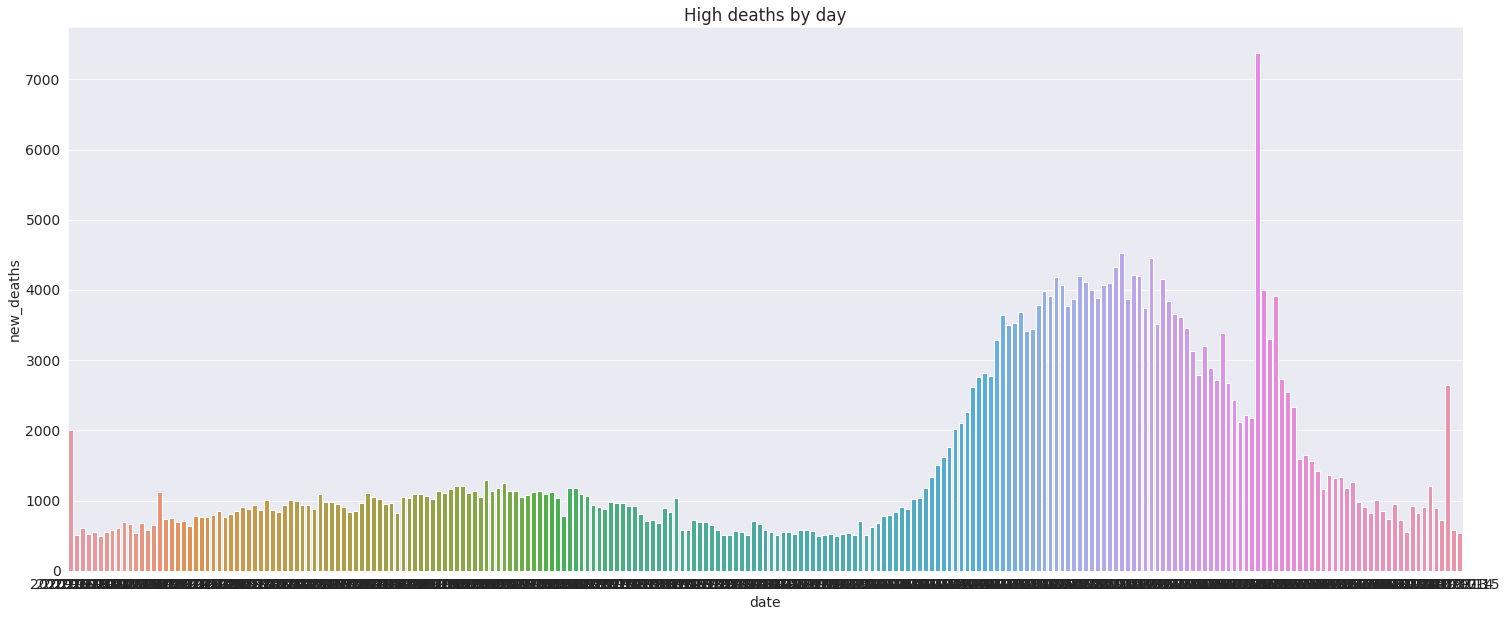

In [107]:
plt.figure(figsize=(25,10))
sns.barplot(high_death_df.date, high_death_df.new_deaths)
plt.title('High deaths by day')

On the day `2021-05-07` has recorded high death case `4187`

## Q7 : How many positive cases were reported on india per month in 2021? 

Let's split the date\ year \ month to make `groupby()` on the datset then plot the cases by the month

In [108]:
india_df['day'] = pd.DatetimeIndex(india_df.date).day
india_df['month'] = pd.DatetimeIndex(india_df.date).month
india_df['year'] = pd.DatetimeIndex(india_df.date).year

india_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,day,month,year
42466,2020-01-30,1.0,NaN,NaN,1.0,NaN,NaN,30,1,2020
42467,2020-01-31,0.0,NaN,NaN,1.0,NaN,NaN,31,1,2020
42468,2020-02-01,0.0,NaN,NaN,1.0,NaN,NaN,1,2,2020
42469,2020-02-02,1.0,NaN,NaN,2.0,NaN,NaN,2,2,2020
42470,2020-02-03,1.0,NaN,NaN,3.0,NaN,NaN,3,2,2020
...,...,...,...,...,...,...,...,...,...,...
42994,2021-07-11,37154.0,724.0,1843500.0,30874376.0,408764.0,430885470.0,11,7,2021
42995,2021-07-12,0.0,0.0,1432343.0,30874376.0,408764.0,432317813.0,12,7,2021
42996,2021-07-13,71771.0,2642.0,1740325.0,30946147.0,411406.0,434058138.0,13,7,2021
42997,2021-07-14,41733.0,583.0,1915501.0,30987880.0,411989.0,435973639.0,14,7,2021


In [109]:
year_20 = india_df.loc[india_df.year == 2021]
cases_per_month = year_20.groupby('month')[['new_cases','new_deaths','total_cases','total_deaths','total_tests']].sum()
cases_per_month

,new_cases,new_deaths,total_cases,total_deaths,total_tests
month,,,,,
1,470901.0,5398.0,326947971.0,4714593.0,5.746644e+09
2,354631.0,2765.0,305984490.0,4362199.0,5.781271e+09
3,1109424.0,5770.0,357487053.0,4941266.0,6.652487e+09
4,6943304.0,48926.0,447598593.0,5389224.0,7.913171e+09
5,9010075.0,120042.0,760936972.0,8510944.0,9.467082e+09
6,2236590.0,67564.0,886909272.0,11218965.0,1.144701e+10
7,615195.0,13072.0,461179925.0,6093193.0,6.378010e+09


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Positive cases per month in the year of 2021')

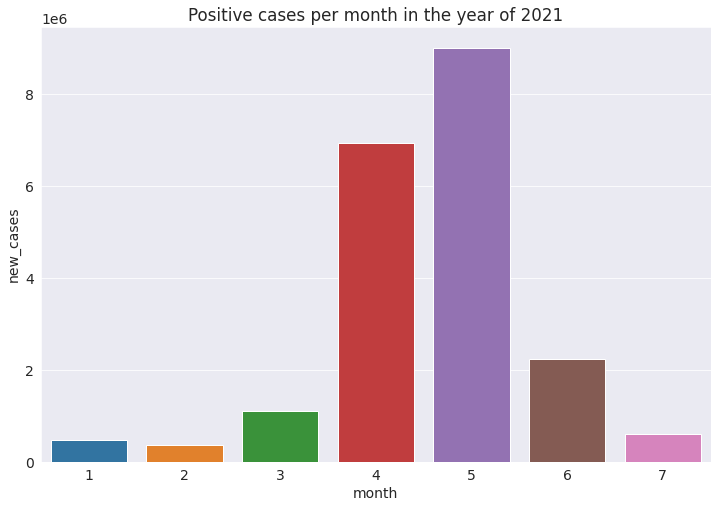

In [110]:
sns.barplot(cases_per_month.index, cases_per_month.new_cases)
plt.title('Positive cases per month in the year of 2021')

We can check [here](https://timesofindia.indiatimes.com/india/indias-covid-19-cases-and-deaths-in-may-highest-in-world-for-any-month/articleshow/83130597.cms) that may month has the highest cases in india, which is the second wave were happend

## Q8 : How many deaths were reported on india per month in 2021? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Deaths per month in the year of 2021')

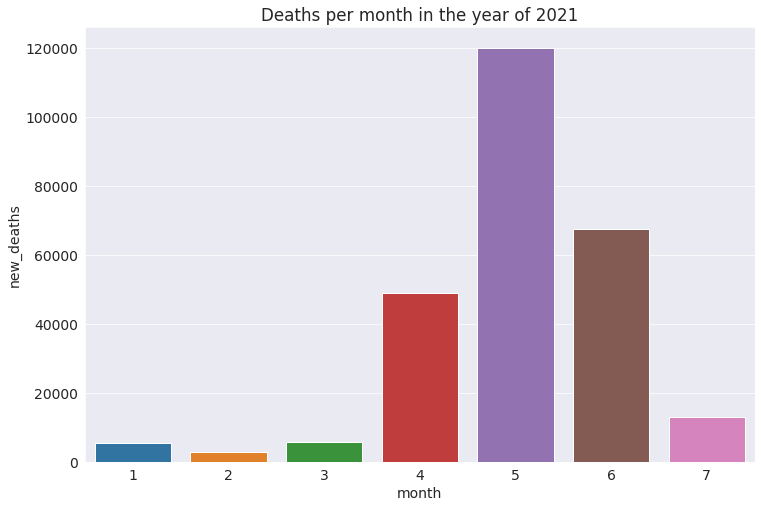

In [111]:
sns.barplot(cases_per_month.index, cases_per_month.new_deaths)
plt.title('Deaths per month in the year of 2021')

## Q9 : How many positive cases were reported on india per month in 2020? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Positive cases per month in the year of 2020')

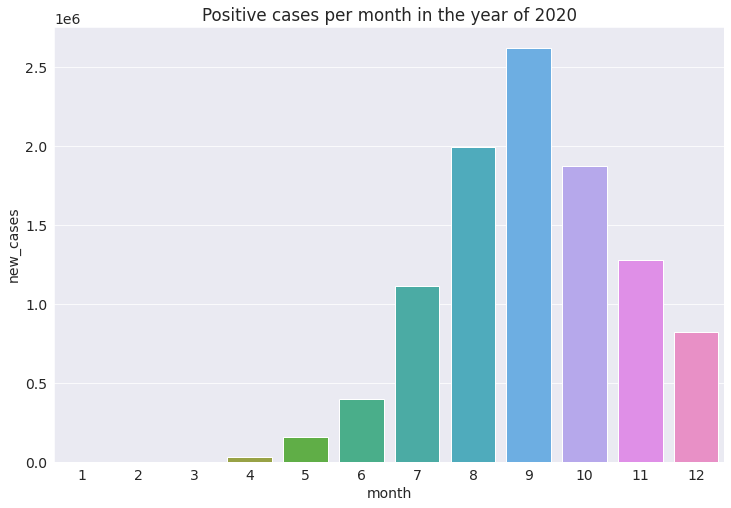

In [112]:
year_20 = india_df.loc[india_df.year == 2020]
cases_per_month_20 = year_20.groupby('month')[['new_cases','new_deaths','total_cases','total_deaths','total_tests']].sum()
sns.barplot(cases_per_month_20.index, cases_per_month_20.new_cases)
plt.title('Positive cases per month in the year of 2020')

## Q10 : How many deaths were reported on india per month in 2020? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Deaths per month in the year of 2020')

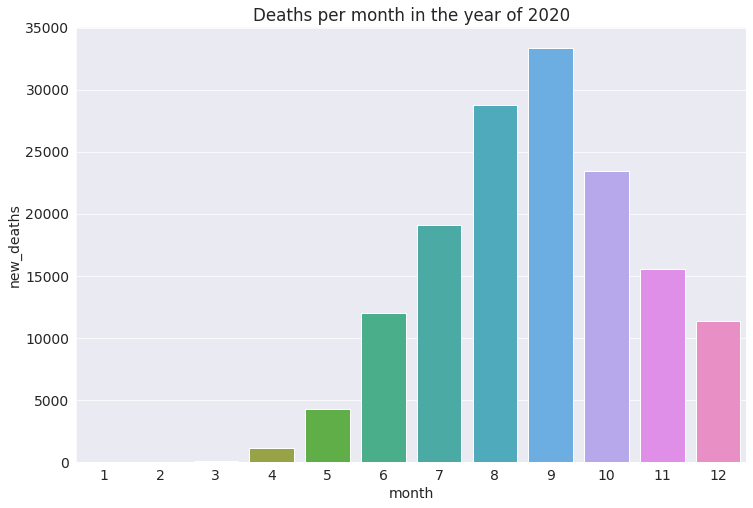

In [113]:
year_20 = india_df.loc[india_df.year == 2020]
cases_per_month_20 = year_20.groupby('month')[['new_cases','new_deaths','total_cases','total_deaths','total_tests']].sum()
sns.barplot(cases_per_month_20.index, cases_per_month_20.new_deaths)
plt.title('Deaths per month in the year of 2020')

## Q11 : How many tests were taken in india on 2020 and 2021? 

Let's make a subplot in [plotly](https://plotly.com/python/subplots/) to display the resuts

In [138]:
#plotly 'go' add more plot on a sinlge graph chart
#make_subplots use to make a grid 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#set the rows and cols of the grid to be displayed
fig = make_subplots(rows=1, cols=2, subplot_titles=('2021 Covid Tests', '2020 Covid Tests'))

fig.append_trace(go.Bar(
   x = cases_per_month_20.index,
   y = cases_per_month_20.total_tests),
    row=1 ,col=2)

fig.append_trace(go.Bar(
    x = cases_per_month.index,
    y = cases_per_month.total_tests
),  row=1, col=1)

#update_layout used to config the graph display items
fig.update_xaxes(title_text='Months', row=1, col=1)
fig.update_xaxes(title_text='Months', row=1, col=2)
fig.update_layout(showlegend=False, title='Number of tests taken in 2020 and 2021')
fig.show()